<a href="https://colab.research.google.com/github/torix/ComplexNetwork/blob/master/ComplexNetwork01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NetworkXを使ったネットワークの登録と描画

ネットワーク描画のためにPythonのライブラリであるNetworkXを利用します．<br>




ネットワークのライブラリであるNetworkXと，描画用にmatplotlibの中のpyplotをインポートします．<br>
%matplotlib inlineはjupyter内でグラフを表示するためのおまじないです．







In [0]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
#set_matplotlib_formats('svg')

ノードとリンクを指定することでネットワークを作成します．<br>
ノードは任意のObject，リンクは二つのノードを追加指定することで作成されます．


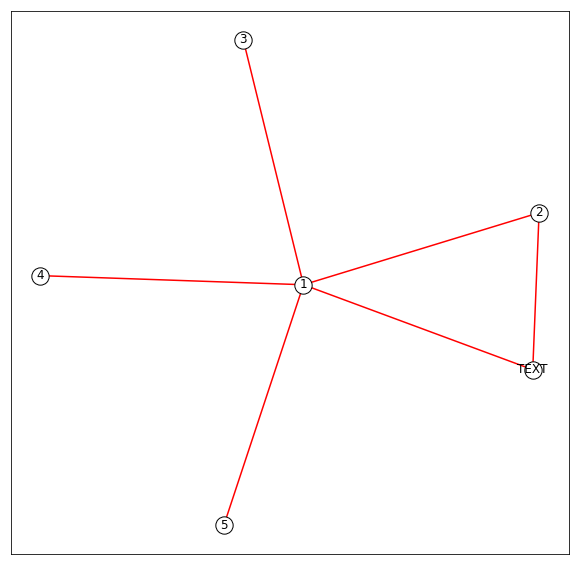

In [10]:
# 無向グラフを作成
G = nx.Graph() 
# 有向グラフの場合は
# G = nx.DiGraph()

# ノードの追加
## 単独で追加する場合
G.add_node(1)
## 複数のノードを同時に追加する場合
G.add_nodes_from([2, 3, 4])
## ノードとして任意のObjectを追加できる
G.add_node("TEXT")

# 辺の追加 (指定していないノードは自動的に追加される)
G.add_edge(1, 2)                                    
G.add_edges_from([(1, 3), (1, 4), (1, "TEXT"), (1, 5)])

#描画する
# 描画サイズ
plt.figure(figsize=(10,10))
# ノードをバネモデルで配置する
pos = nx.spring_layout(G, k=0.3)
# ノード，エッジ，ラベルの描画
nx.draw_networkx_edges(G, pos, edge_color='red', width=1.5)
nx.draw_networkx_nodes(G, pos, node_color='white', edgecolors="black")
nx.draw_networkx_labels(G, pos)

# 描画
plt.show()


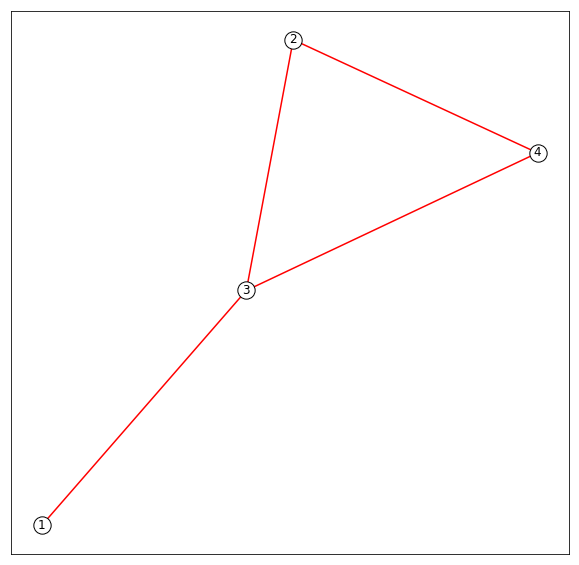

In [11]:
# 無向グラフを作成
G = nx.Graph() 

# ネットワークの作成
G.add_edges_from([(1,3), (2,3), (2,4),(3,4)])


#描画する
# 描画サイズ
plt.figure(figsize=(10,10))
# ノードをバネモデルで配置する
pos = nx.spring_layout(G, k=0.3)
# ノード，エッジ，ラベルの描画
nx.draw_networkx_edges(G, pos, edge_color='red', width=1.5)
nx.draw_networkx_nodes(G, pos, node_color='white', edgecolors="black")
nx.draw_networkx_labels(G, pos)

# 描画
plt.show()


In [15]:
# ネットワークを読み込む
G = nx.read_edgelist("lec1-q2.csv", delimiter=',', nodetype=int, encoding="utf-8")

# ノード，エッジ，ラベルの描画
nx.draw_networkx_edges(G, pos, edge_color='red', width=1.5)
nx.draw_networkx_nodes(G, pos, node_color='white', edgecolors="black")
nx.draw_networkx_labels(G, pos)

# 描画
plt.show()

FileNotFoundError: ignored